Playing around with data and code so will be unstructured. See [audio-main notebook]() for structure

Load and run main notebook to get `visual_features_paths` variable

In [2]:
main_notebook = 'main.ipynb'

In [3]:
%load main_notebook

In [4]:
%run 'main.ipynb'

# Listen to audio

# Random plots

In [48]:
def create_plots(female_s1_load, male_s1_load):
    fig, ax = plt.subplots(nrows=3, sharex=True)

    librosa.display.waveshow(female_s1_load, ax=ax[0], color='g')
    # librosa.display.waveshow(male_s1_load, ax=ax[0], color='r')

    ax[0].set(title='F: Envelope view, mono')
    ax[0].label_outer()

    # librosa.display.waveshow(female_s1_load, ax=ax[1])
    librosa.display.waveshow(male_s1_load, ax=ax[1], color='r')

    ax[1].set(title='M: Envelope view, stereo')
    ax[1].label_outer()
    
    
    
    # female_y_harm, female_y_perc = librosa.effects.hpss(female_s1_load)
    # librosa.display.waveshow(female_y_harm, alpha=0.5, ax=ax[2], label='Female Harmonic')
    # librosa.display.waveshow(female_y_perc, color='r', alpha=0.5, ax=ax[2], label='Female Percussive')
    # male_y_harm, male_y_perc = librosa.effects.hpss(male_s1_load)
    # librosa.display.waveshow(male_y_harm, alpha=0.5, ax=ax[2], label='Male Harmonic')
    # librosa.display.waveshow(male_y_perc, color='g', alpha=0.5, ax=ax[2], label='Male Percussive')

    # ax[2].set(title='Multiple waveforms')
    # ax[2].legend()

    # plt.close()

In [49]:
# print(female_s1_load.shape, female_s1_load)
# print(male_s1_load.shape, male_s1_load)

In [50]:
# create_plots(female_s1_load, male_s1_load)

In [51]:
# reduced_max = skimage.measure.block_reduce(female_s1_load, (2,2), np.max)
# print(reduced_max)

# reduced_mean = skimage.measure.block_reduce(female_s1_load, (2,2), np.mean)
# print(reduced_mean)

# reduced_min = skimage.measure.block_reduce(female_s1_load, (2,2), np.min)
# print(reduced_min)

In [52]:
# fig, ax = plt.subplots(nrows=3, sharex=True)
# librosa.display.waveshow(reduced_max, ax=ax[0], color='r')
# librosa.display.waveshow(reduced_mean, ax=ax[1], color='g')
# librosa.display.waveshow(reduced_min, ax=ax[2], color='b')

# ax[0].set(title='F: Envelope view, mono')
# ax[0].label_outer()

# plt.close()

# Reduce dimensions

In [33]:
def reduce_dim(specific_file):
    """
    Parameters:
    
    Return:
    """
    
    # N, D = specific_file.shape
    # print(N, D)
    # reduced_dim_array = np.column_stack((np.repeat(np.arange(N),D), specific_file.reshape(N*D,-1)))
    # df = pd.DataFrame(reduced_dim_file) 
    
    return

In [34]:
# df.plot()

In [1]:
# for audio_features_path in audio_features_paths:
#     # print("Current path with files is: ", audio_features_path)
#     path_exists = os.path.exists(audio_features_path)
#     print(path_exists)
#     if path_exists == True:
#         print("  Shape: ", np.shape(load_audio_features_file))
#         load_audio_features_file = np.load(audio_features_path)
#         # reduce_dim(load_audio_features_file)
#         resampled_audio = librosa.resample(load_audio_features_file, orig_sr=22050, target_sr=8000)
#         print("  Reduced shape: ", np.shape(resampled_audio))
#         print()
#     else:
#         print("CANNOT find current path: ", audio_features_path)
    

In [7]:
ys = features_with_y.loc[0:, 'emotion_labels']
# ys

In [8]:
def reduce_temporal_dimension(visual_features_paths, ys):
    """Reduce from 2D to 1D by removing the time dimension
    
    visual_features_paths -- list
    
    Return 
    reduced shapes of each input -- list
    """
    
    reduced_audio_features = []
    true_labels = []
    
    for row in range(len(audio_features_paths)):
        # print("Current path with files is: ", audio_features_path)
        path_exists = os.path.exists(audio_features_paths[row])
        # print(path_exists)
        if path_exists == True:
            # print("Current path with files is: ", audio_features_path)
            load_audio_features_file = np.load(audio_features_paths[row])
            # print("  Original Shape: ", np.shape(load_audio_features_file))
            resampled_audio = np.mean(load_audio_features_file, axis=0)
            # print("  Reduced shape: ", np.shape(resampled_audio))
            reduced_audio_features.append(resampled_audio)
            # print("  reduced_audio_features: ", np.shape(reduced_audio_features))
            true_labels.append(ys[row])
            # print()
        else:
            pass
            # print("CANNOT find current path: ", audio_features_path)
    return reduced_audio_features, true_labels

In [9]:
reduced_temporal_dimensions, true_labels = reduce_temporal_dimension(visual_features_paths, ys)
np.shape(reduced_temporal_dimensions), np.shape(true_labels)

((1327, 128), (1327,))

# Split Datasets into Train, Validate, Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(reduced_temporal_dimensions, true_labels, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_test)
total_Y = len(y_train) + len(y_test)
len(X_train), len(X_test), len(y_train), len(y_test), total_X, total_Y

(398, 929, 398, 929, 1327, 1327)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_val)
total_Y = len(y_train) + len(y_val)
len(X_train), len(X_val), len(y_train), len(y_val), total_X, total_Y, np.shape(X_train), np.shape(y_train)

(119, 279, 119, 279, 398, 398, (119, 128), (119,))

# Before Hyper-Parameter Tuning

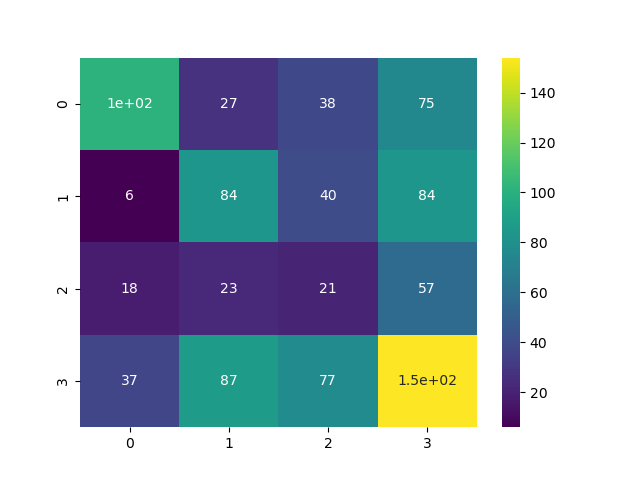

In [27]:
before_hp_model = svm.LinearSVC()
before_hp_model.fit(X_train, y_train)
y_pred = before_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       241
           1       0.38      0.39      0.39       214
           2       0.12      0.18      0.14       119
           3       0.42      0.43      0.42       355

    accuracy                           0.39       929
   macro avg       0.38      0.36      0.36       929
weighted avg       0.42      0.39      0.40       929



# After Hyper-Parameter Tuning

In [29]:
# estimator is LinearSVC()
linear_classifier = svm.LinearSVC()
parameters = param_grid = {
    'C': [0.01, 0.1, 10, 100], 
    # 'class_weight': [1],
    # 'dual':,
    'fit_intercept': [True, False],
    # 'intercept_scaling':,
    'loss': ['hinge', 'squared_hinge'],
    # 'max_iter':,
     # 'multi_class': [1],
    # 'penalty': ['l1', 'l2'],
    'penalty': ['l2'],
    # 'random_state':,
    # 'tol': , 
    # 'verbose':    
}

classification = GridSearchCV(linear_classifier, param_grid=parameters, cv=10, return_train_score=True)
classification

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [30]:
classification.fit(X_train, y_train)

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [16]:
print(classification.best_estimator_)

LinearSVC(C=0.01, loss='hinge')


In [17]:
print("Accuracy:"+ str(classification.score(X_train, y_train)))

Accuracy:0.5886792452830188


In [18]:
# note difference in Accuracy with 'fit_intercept': [True'] vs 'fit_intercept': [False],
print(classification.best_params_)
print("Accuracy:"+ str(classification.best_score_))

{'C': 0.01, 'fit_intercept': True, 'loss': 'hinge', 'penalty': 'l2'}
Accuracy:0.5056980056980057


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4463276836158192

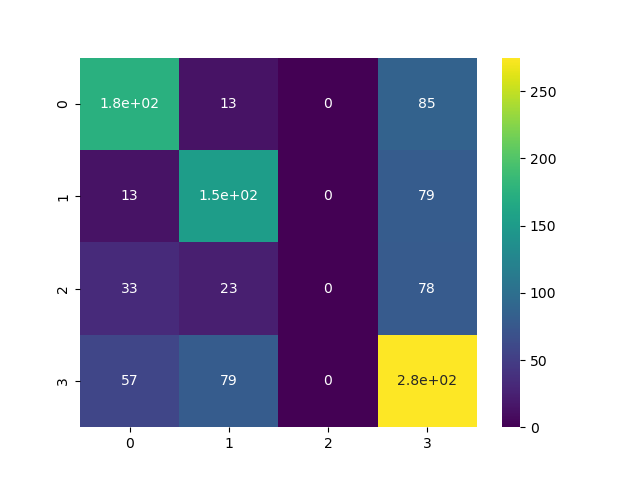

In [20]:
after_hp_model = svm.LinearSVC(C=0.01, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       273
           1       0.57      0.62      0.59       244
           2       0.00      0.00      0.00       134
           3       0.53      0.67      0.59       411

    accuracy                           0.57      1062
   macro avg       0.43      0.48      0.46      1062
weighted avg       0.50      0.57      0.53      1062



/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


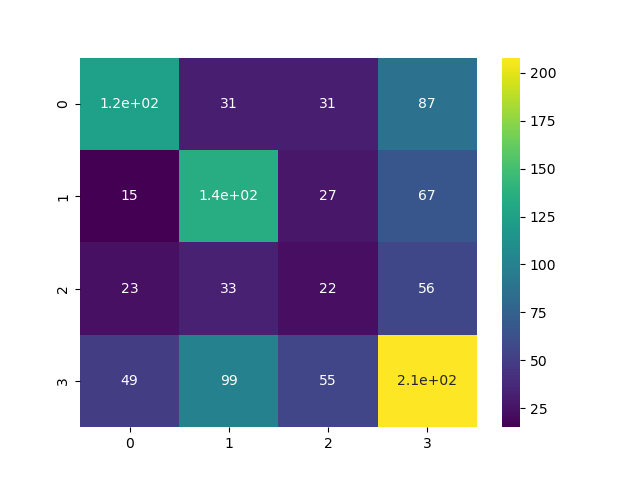

In [22]:
after_hp_model = svm.LinearSVC(C=1, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


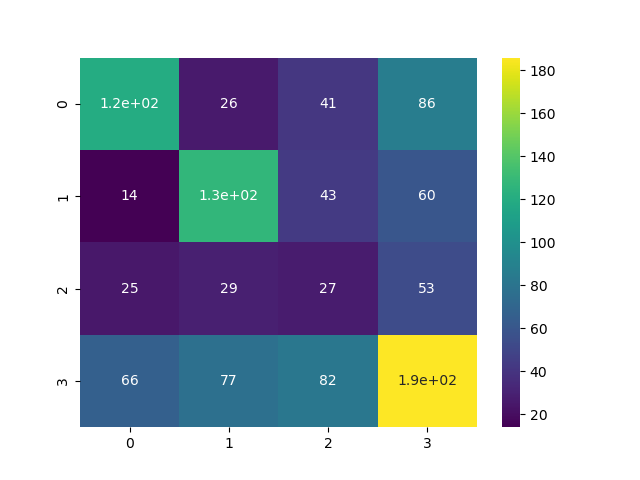

In [23]:
after_hp_model = svm.LinearSVC(C=10, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()